In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import gc
import collections
import matplotlib.pyplot as plt
import seaborn as sns
from enum import Enum

<h2> GridWorld Simulation </h2>

In this section, we use dynamic programming techniques on Bellman optimal equations to calculate optimal policies with value iteration. The scenario is a discounted, episodic task, in the form of a 5x5 grid matrix where row 1 column 1 is the terminal cell. Different rewards are experimented with to generate the policies for the path to be taken by an agent in the environment. Specifically, <br/>
$$v_{*}(s) = {max}_{a} \sum_{s',r} p(s',r | s,a)(r + \gamma v_{*}(s'))$$
$$\pi_{*}(s) = {argmax}_{a} \sum_{s',r} p(s',r | s,a)(r + \gamma v_{*}(s'))$$
where s is the current state, a is an action, s' is a possible successor state, and r is the reward involved. Note that $v_{*}$ is the value function and $\pi_{*}$ the policy derived from Bellman optimality equations. For dynamic programming, we greate update rules of the form:
$$v_{k+1}(s) = {max}_{a} \sum_{s',r} p(s',r | s,a)(r + \gamma v_{k}(s'))$$
with $v_{0}$ being randomly initialized and $v_{k} \to v_{*}$ as $k \to \infty$ under the GPI framework.

In [2]:
class policy(Enum):
        LEFT, RIGHT, UP, DOWN = 1, 2, 3, 4
def simulator(rewardmtrx, transitionrwd, discount, terminals, error=1e-3):
    v0, v1 = np.zeros(rewardmtrx.shape), np.zeros(rewardmtrx.shape)
    greedypol = dict()
    def is_terminal(i,j):
        return ((i,j) in terminals)
    while True:
        for i in range(v1.shape[0]):
            for j in range(v1.shape[1]):
                if is_terminal(i,j): continue
                leftval = discount*v0[i][j-1]+rewardmtrx[i][j-1] if j>0 else 0
                rightval = discount*v0[i][j+1]+rewardmtrx[i][j+1] if j<(v1.shape[1]-1) else 0
                upval = discount*v0[i-1][j]+rewardmtrx[i-1][j] if i>0 else 0
                downval = discount*v0[i+1][j]+rewardmtrx[i+1][j] if i<(v1.shape[0]-1) else 0
                values = np.array([leftval, rightval, upval, downval])+transitionrwd
                v1[i][j] = np.max(values)
                pol = policy(np.argmax(values)+1)
                if not greedypol.get(i, None):
                    greedypol[i] = dict()
                greedypol[i][j] = pol
        if (np.abs(v0-v1).max()<=error):
            break
        np.copyto(v0, v1)
    return v0, greedypol

In [3]:
def plotter(rewardmtrx, transitionrwd, discount, terminals, error=1e-3):
    val, pol = simulator(rewardmtrx, transitionrwd, discount, terminals, error)
    def is_terminal(i,j):
        return ((i,j) in terminals)
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.heatmap(rewardmtrx, cmap="Blues", annot=True, fmt='.1f')
    plt.title("Rewards")
    plt.subplot(1,3,2)
    sns.heatmap(val, cmap="Blues", annot=True, fmt='.1f')
    plt.title("Optimal Value Function")
    ax = plt.subplot(1,3,3)
    plt.title("Optimal Policy")
    ax.table(cellText=np.zeros(rewardmtrx.shape, dtype='<U1'), loc='center', bbox=[0,0,1,1])
    for i in range(rewardmtrx.shape[0]):
        for j in range(rewardmtrx.shape[1]):
            if is_terminal(i, j): continue
            xlen, ylen = 1/rewardmtrx.shape[1], 1.1/rewardmtrx.shape[0]
            if pol[i][j]==policy.LEFT:
                plt.arrow(xlen*(1.2*j+0.5), ylen*(rewardmtrx.shape[0]-1.1*i-0.5), -xlen/2, 0, width=0.01)
            elif pol[i][j]==policy.RIGHT:
                plt.arrow(xlen*(1.2*j-0.25), ylen*(rewardmtrx.shape[0]-1.1*i-0.5), xlen/2, 0, width=0.01)
            elif pol[i][j]==policy.UP:
                plt.arrow(xlen*(1.2*j), ylen*(rewardmtrx.shape[0]-1.1*i-0.75), 0, ylen/2, width=0.01)
            elif pol[i][j]==policy.DOWN:
                plt.arrow(xlen*(1.2*j), ylen*(rewardmtrx.shape[0]-1.1*i), 0, -ylen/2, width=0.01)
    ax.axis("tight")
    ax.axis("off")
    plt.show()

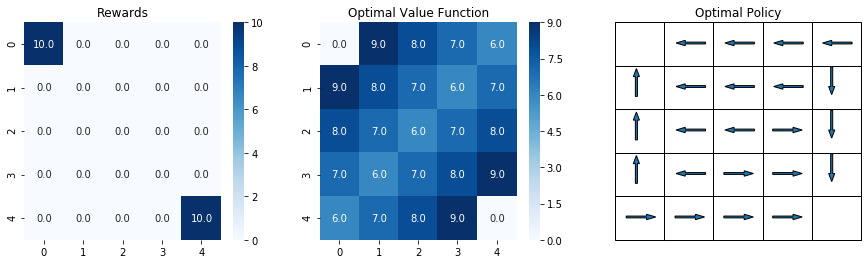

In [4]:
#Two-Terminal Cell Design
rewardmtrx = np.zeros((5,5))
rewardmtrx[0,0] = 10
rewardmtrx[4,4] = 10
transitionrwd = -1
discount = 1
plotter(rewardmtrx, transitionrwd, discount, {(0,0),(4,4)}, 1e-3)

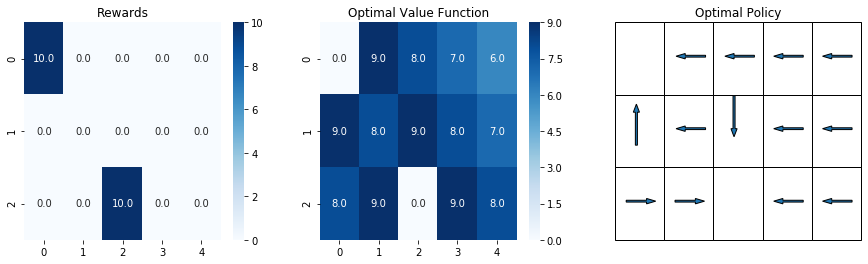

In [5]:
#Non-Symmetric Design
rewardmtrx = np.zeros((3,5))
rewardmtrx[0,0] = 10
rewardmtrx[2,2] = 10
transitionrwd = -1
discount = 1
plotter(rewardmtrx, transitionrwd, discount, {(0,0),(2,2)}, 1e-3)

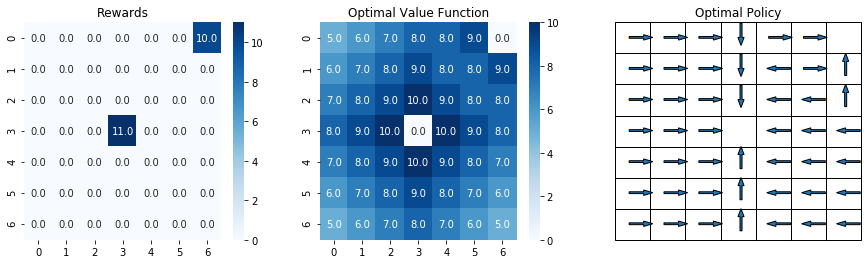

In [10]:
#Differential Terminal Conditions
rewardmtrx = np.zeros((7,7))
rewardmtrx[0,6] = 10
rewardmtrx[3,3] = 11
transitionrwd = -1
discount = 1
plotter(rewardmtrx, transitionrwd, discount, {(0,6),(3,3)}, 1e-3)

<h2>Coin-Flip Gamble</h2>